<hr style="height:5px;border:none" />
<h1 align="center">KeyPoint Detection Competition</h1>
<hr style="height:5px;border:none" />
<ul>
    <li>Name: Yunxiang Liu</li>
    <li>Wechat Account: Claude13786489290</li>
    <li>Github Name: iClaude1998</li>
    <li>Email: 1316761893@qq.com</li>
</ul>


<div>
    <h2>Task 1: Data Loading and Sample Viewing </h2>
    <hr style="border:none;border-top:2px dotted #185598;" />
    <p>Load data, view a sample</p>
</div>




In [1]:
import cv2
import pandas as pd
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
train_path = '../xfdata/train.npy/train.npy'
test_path = '../xfdata/test.npy/test.npy'
label_path = '../xfdata/train.csv'

labels = pd.read_csv(label_path)
train_imgs = np.load(train_path)
test_imgs = np.load(test_path)

print('The key points coordinates(partial): \n {}'.format(labels.head(5)))
print('The training dataset storage data in format: {}'.format(train_imgs.shape))
print('The test dataset storage data in format: {}'.format(test_imgs.shape))


The key points coordinates(partial): 
    left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.342364          38.523613           28.930840   
1          68.912604          31.409117           29.652226   
2          68.708994          40.371149           27.130820   
3          65.334176          35.471878           29.366461   
4          68.634857          29.999486           31.094571   

   right_eye_center_y  nose_tip_x  nose_tip_y  mouth_center_bottom_lip_x  \
0           35.577773   49.256845   68.275955                  47.783946   
1           33.028075   51.913358   48.408453                  50.698868   
2           40.940680   44.502523   69.988486                  45.926427   
3           37.767684   50.411373   64.934767                  50.028780   
4           29.616429   50.247429   51.450857                  47.948571   

   mouth_center_bottom_lip_y  
0                  85.361582  
1                  79.574038  
2                  86.221009  
3

Let's view a sample image and its corresponding keypoints

In [3]:
def view_sample(img, labels, index):
    plt.imshow(np.uint8(img[:, :, index]), cmap='gray')
    # The pandas, numpy has different view rules
    if isinstance(labels, np.ndarray):
        plt.scatter(labels[[i for i in range(0, labels.size, 2)]], 
                    labels[[i for i in range(1, labels.size, 2)]],
                   c='r')
    else:
        plt.scatter(labels.iloc[index, [i for i in range(0, len(labels.iloc[index]), 2)]],
                   labels.iloc[index, [i for i in range(1, len(labels.iloc[index]), 2)]],
                   c='r')
    plt.show()
        
    
    

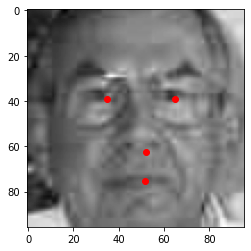

In [4]:
view_sample(train_imgs, labels, 50)

<div>
    <h2>Task 2: Statistic Analysis </h2>
    <hr style="border:none;border-top:2px dotted #185598;" />
    <p>Next, lets view the distribution of 4 keypoints of all train images. First, checking the distribution of 4 points on a figure</p>
</div>

<h3>Task 2.1 Basic Statistic information</h3>

In [5]:
for head in labels.columns:
    info = stats.describe(labels.dropna()[head])
    print('     {}     |  {}  |  {}  |  {}  |  {}  |'.format('Location', 'min', 'max', 'mean', 'variance'))
    print('{}|{:.2f}|{:.2f}|{:.2f}|{:.2f}|'.format(head, info.minmax[0], info.minmax[1], info.mean, info.variance))
    print('------------------------------------------------------------------------')

     Location     |  min  |  max  |  mean  |  variance  |
left_eye_center_x|35.35|94.69|66.34|11.41|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
left_eye_center_y|4.42|80.50|37.58|9.55|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
right_eye_center_x|0.69|85.04|30.31|9.03|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
right_eye_center_y|6.89|81.27|37.96|8.65|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
nose_tip_x|19.22|89.44|48.40|17.86|
------------------------------------------------------------------------
     Location     |  min  |  max  |  mean  |  variance  |
nose_tip_y|26.37|88.83|62.69|31.76|
-----------------------------------------------

<h3>Task 2.2 Key points distributions on all face location</h3>

First, lets view key points together, with an image in training dataset for reference

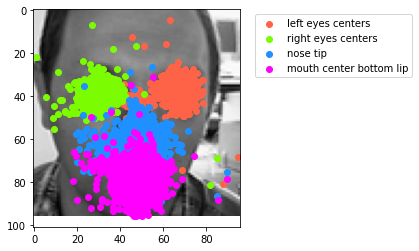

In [6]:
# Display a background image for reference
plt.imshow(np.uint8(train_imgs[:, :, 66]), cmap='gray')
# Let's view all keypoints, notices that, we ignore the samples with any missing value:
Nonull_labels = labels.dropna()
colors = ['tomato', 'lawngreen', 'dodgerblue', 'magenta']
for i in range(Nonull_labels.shape[1] // 2):
    plt.scatter(Nonull_labels.iloc[:, 2*i], Nonull_labels.iloc[:, 2*i+1], c=colors[i])
plt.legend(['left eyes centers', 'right eyes centers', 'nose tip', 'mouth center bottom lip'],
          loc=2, bbox_to_anchor=(1.05,1.0))
plt.show()
    

<p>Then, let's plot the keypoints distribution of different position as heatmap one by one</p>

In [7]:
def view_keypoints(labels, feature_name):
    Nonull_labels = labels.dropna()
    x_range = [Nonull_labels[feature_name+'_x'].mean() - 3*Nonull_labels[feature_name+'_x'].std(),
              Nonull_labels[feature_name+'_x'].mean() + 3*Nonull_labels[feature_name+'_x'].std()]
    y_range = [Nonull_labels[feature_name+'_y'].mean() - 3*Nonull_labels[feature_name+'_y'].std(),
              Nonull_labels[feature_name+'_y'].mean() + 3*Nonull_labels[feature_name+'_y'].std()]
    ranges = np.array([x_range, y_range]).astype('int')
    bins = np.max(ranges[:, 1] - ranges[:, 0])

    H, xedges, yedges = np.histogram2d(Nonull_labels[feature_name+'_x'].values,
                                       Nonull_labels[feature_name+'_y'].values,
                                       bins=bins,
                                       range=ranges,
                                       normed=False)
    X, Y = np.meshgrid(xedges, yedges)
    plt.pcolormesh(X, Y, H, cmap='autumn')
    plt.colorbar()
    plt.title(' '.join(feature_name.split('_')))
    plt.xlabel('x coord')
    plt.ylabel('y coord')
    plt.show()

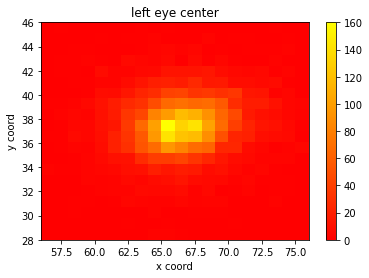

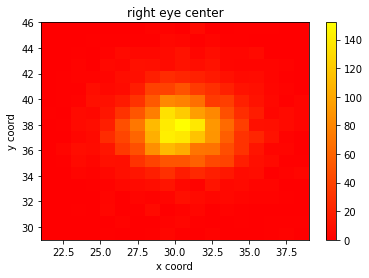

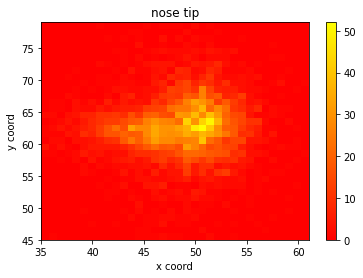

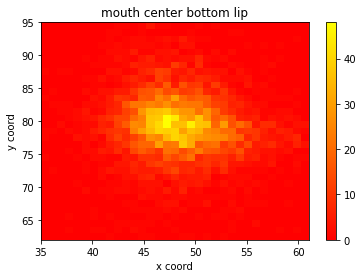

In [8]:
locations = ['left_eye_center', 'right_eye_center', 'nose_tip', 'mouth_center_bottom_lip']
for loc in locations:
    view_keypoints(labels, loc)

It Seems that the left, right eye follows the Gaussian Distribution, so as the mouth center bottom lip, Let's verify it via<strong> KsTest</strong>

In [9]:
def Ks_test(labels, verify_feature, verify_distribustion='norm'):
    test_labels = labels[verify_feature].dropna()
    mean = test_labels.mean()
    std = test_labels.std()
    test_labels = test_labels[(test_labels >= (mean - 3*std)) & (test_labels <= (mean + 3*std))]
    D, p = stats.kstest(test_labels, verify_distribustion, (test_labels.mean(), test_labels.std()))
    if p >= 0.05:
        print('{} follows the {} distribution'.format(verify_feature, verify_distribustion))
    else:
        print('Unfortunately, {} do NOT follows the {} distribution'.format(verify_feature, verify_distribustion))
        test_labels.plot.kde(bw_method=0.3)
        pdf = getattr(stats, verify_distribustion)
        samples = pdf.rvs(loc=test_labels.mean(), scale=test_labels.std(), size=len(test_labels))
        pd.Series(samples).plot.kde(bw_method=0.3, c='r')
        plt.legend(['kde of {}'.format(verify_feature), 'kde of True distribution'], loc=2, bbox_to_anchor=(1.05,1.0))
        plt.show()
    
    
    
    

Unfortunately, left_eye_center_x do NOT follows the norm distribution


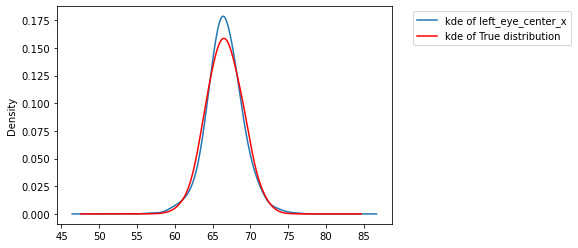

Unfortunately, left_eye_center_y do NOT follows the norm distribution


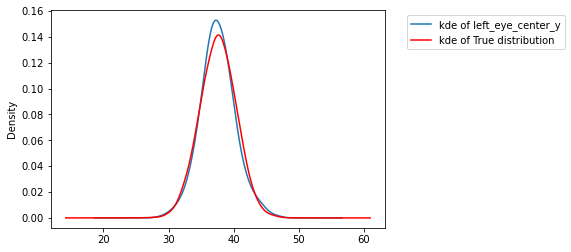

Unfortunately, right_eye_center_x do NOT follows the norm distribution


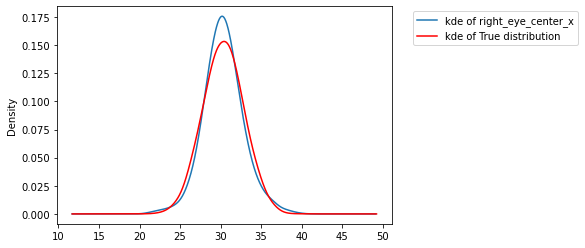

Unfortunately, right_eye_center_y do NOT follows the norm distribution


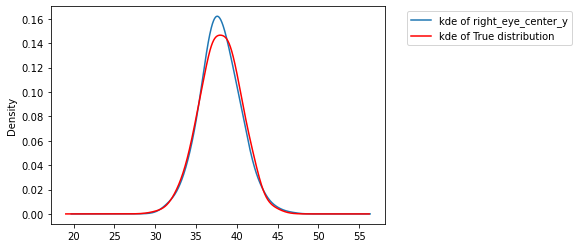

Unfortunately, nose_tip_x do NOT follows the norm distribution


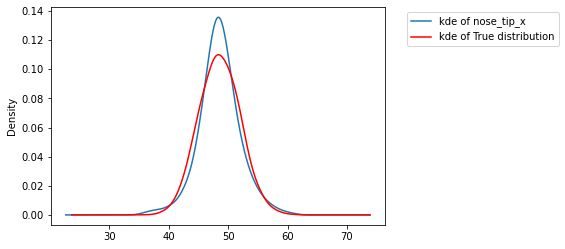

Unfortunately, nose_tip_y do NOT follows the norm distribution


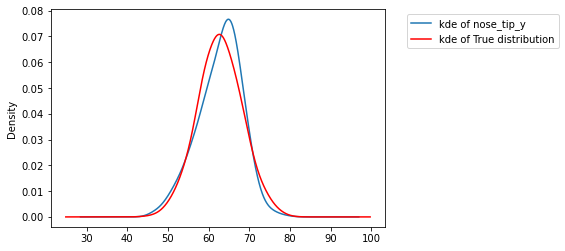

Unfortunately, mouth_center_bottom_lip_x do NOT follows the norm distribution


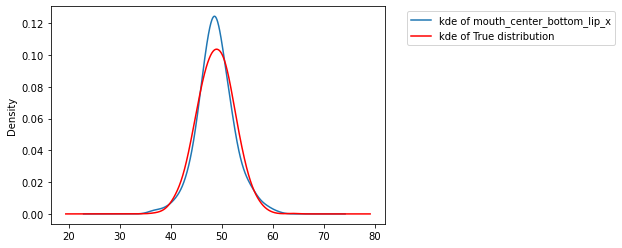

Unfortunately, mouth_center_bottom_lip_y do NOT follows the norm distribution


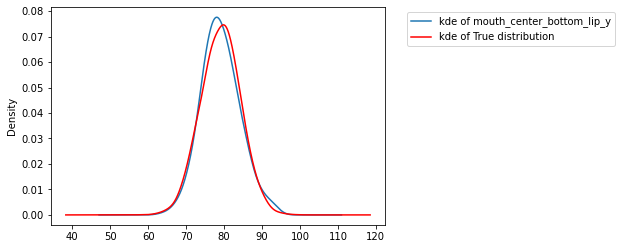

In [10]:
full_locs = ['left_eye_center_x', 'left_eye_center_y', 
             'right_eye_center_x', 'right_eye_center_y',
             'nose_tip_x', 'nose_tip_y', 
             'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']
for loc in full_locs:
    Ks_test(labels, loc)

<p>As the results show above, although the all of the keypoints fail passing Ks Test, we can still conclude that the keypoints follow the Gaussian distribution</p>
<br/>
<p>Next, lets fit the keypoints with the exact Gaussian distribution</p>

In [11]:
def Gaussian(labels, feature):
    # Delete the Null values and outliers
    test_labels = labels.dropna()[[feature+ '_x', feature + '_y']]
    mean = test_labels.mean()
    std = test_labels.std()
    test_labels = test_labels[(test_labels >= (mean - 3*std)) & (test_labels <= (mean + 3*std))]
    # Generate Gaussian Distribution
    # print('Mean of Gaussian: {}\n'.format(test_labels.mean().values))
    # print('Covafiance matrix of Gaussian: {}\n'.format(test_labels.cov().values))
    return stats.multivariate_normal(test_labels.mean(), test_labels.cov()), test_labels.mean().values, test_labels.std().values

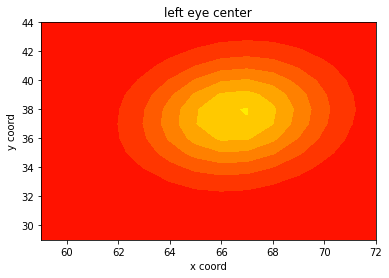

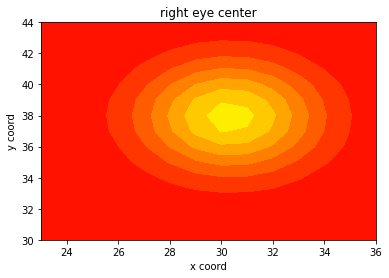

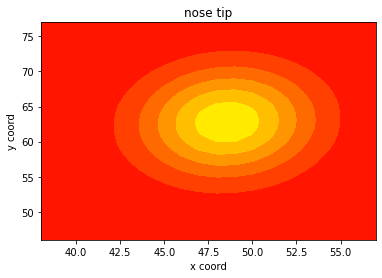

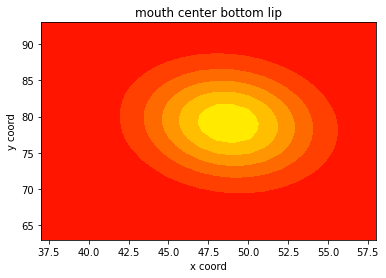

In [12]:
for feature in locations:
    rv, mean, std = Gaussian(labels, feature)
    x, y = np.mgrid[int(mean[0] - 3*std[0]):int(mean[0] + 3*std[0]), int(mean[1] - 3*std[1]):int(mean[1] + 3*std[1])]
    pos = np.dstack((x, y))
    plt.contourf(x, y, rv.pdf(pos), cmap='autumn')
    plt.title(' '.join(feature.split('_')))
    plt.xlabel('x coord')
    plt.ylabel('y coord')
    plt.show()

<h3>Task 3.1 Filling the Null values</h3>

<p>Let's try filling the Null value with the samples from the Gaussain distributions in Task 2<p> 

In [13]:
rves = [Gaussian(labels, feature)[0] for feature in locations]

for i in range(labels.shape[0]):
    samples = np.array([rv.rvs(1) for rv in rves]).flatten()
    dicts = {feature: sample for feature, sample in zip(full_locs, samples)}
    labels.iloc[i, :].fillna(dicts, inplace=True)

<p>Check whether Task 3.1 done successfully</p>

In [14]:
print(labels.isnull().any())

left_eye_center_x            False
left_eye_center_y            False
right_eye_center_x           False
right_eye_center_y           False
nose_tip_x                   False
nose_tip_y                   False
mouth_center_bottom_lip_x    False
mouth_center_bottom_lip_y    False
dtype: bool


<h3>Task 3.2 Build MLP based on sciklearn</h3>

<p>Let's try MLP for keypoints detect. First of all, we import the sklearn pakage and build data pipeline</p>

In [15]:
import math
import random
import sklearn

from sklearn.model_selection import train_test_split

<h4>Task 3.2.1 Build data augumentation </h4>

Let's build some common image augumentations

In [16]:
# The image augumentation classes:


class Random_resized_crop:
    '''
    Randomly cropping a part of image in a random region and resize it to target size
    prob: the probability the image doing this transformation
    size: the target size to be resized
    scale: the range of scale the area of the cropped image to the original image
    ratio: the width-height ratio of the cropped image
    interpolation: the image resizing interpolation method, set inter_linear as default
    '''
    
    def __init__(self, prob, size, scale=(0.08, 1.0), ratio=(3. / 4, 4. / 3), interpolation=cv2.INTER_LINEAR):
        self.prob = prob
        self.size = size
        self.scale = scale
        self.ratio = ratio
        self.interpolation = interpolation
    
    @staticmethod
    def get_params(img, scale, ratio):
        ho, wo = img.shape
        for _ in range(10):
            area = ho * wo
            croped_area = random.uniform(*scale) * area
            aspect_ratio = random.uniform(*ratio)
            w = int(math.sqrt(round(croped_area * aspect_ratio)))
            h = int(math.sqrt(round(croped_area / aspect_ratio)))
            
            if random.random() < 0.5:
                w, h = h, w
            if w <= wo and h <= ho:
                i = random.randint(h // 2, ho - h // 2)
                j = random.randint(w // 2, wo - w // 2)
                return i, j, h, w, ho, wo
            
        #Callback    
        w = min(ho, wo)

        return ho // 2, wo // 2, w, w
    
    def __call__(self, img, label):
        if random.random() < self.prob:
            i, j, h, w, ho, wo = self.get_params(img, self.scale, self.ratio)
            label = label.reshape(4, 2)
            label[:, 0] = label[:, 0] * (wo / w) - j / w + 0.5
            label[:, 1] = label[:, 1] * (ho / h) - i / h + 0.5
            label[label < 0] = -1.
            label[label > 1] = -1.
            label = label.flatten()
            img = img[int(i - h/2): int(i + h/2 + 1), int(j - w/2): int(j + w/2 + 1)]
            print(img.shape)
            img = cv2.resize(img, (self.size, self.size), interpolation=self.interpolation)
        return img, label
    
    def __repr__(self):
        return self.__class__.__name__ + '()'
    
            
class Horizontal_flip:
    '''
    Randomly fliping the image Horizontally
    prob: the proability fliping the image
    
    '''
    
    def __init__(self, prob):
        self.prob = prob
        
    def __call__(self, img, label):
        if random.random() < self.prob:
            img = img[:, ::-1]
            coords = label.reshape(4, 2)
            coords[:, 0] = 1 - coords[:, 0]
            label = coords.flatten()
        return img, label
    
    def __repr__(self):
        return self.__class__.__name__ + '()'

    
class Vertical_flip:
    '''
    Randomly fliping the image vertically
    prob: the proability fliping the image
    
    '''
    
    def __init__(self, prob):
        self.prob = prob
        
    def __call__(self, img, label):
        if random.random() < self.prob:
            img = img[::-1, :]
            coords = label.reshape(4, 2)
            coords[:, 1] = 1 - coords[:, 1]
            label = coords.flatten()
        return img, label
    
    def __repr__(self):
        return self.__class__.__name__ + '()'

    
class Resize:
    '''
    Resize an image to (img/rate, img/rate)
    prob: the probability that resize the image
    resize_rate, the rate bewteen resized image and original image
    
    '''
    def __init__(self, resized_shape=96, interpolation=cv2.INTER_LINEAR):
        self.rsz_shp = resized_shape
        self.interpolation = interpolation
        
    def __call__(self, img, label):
        img = cv2.resize(img, (self.rsz_shp, self.rsz_shp), interpolation=self.interpolation)
        return img, label
    
    def __repr__(self):
        return self.__class__.__name__ + '()'

    
class Normalise:
    '''Normalise an image with mean and std'''
    
    def __init__(self, mean=124.70, std=59.31):
        self.mean = mean
        self.std = std
    
    def __call__(self, img, label):    
        if self.mean is None:
            self.mean = np.mean(img)
        if self.std is None:
            self.std = (np.std(img) if bool(np.std(img)) else 1.)
        img = (img - self.mean) / self.std
        return img, label
    
    def __repr__(self):
        return self.__class__.__name__ + '()'
    
class flatten:
    '''
    If implementing the prue MLP for training, we need to flatten the image into a 1-D arraay
    
    ''' 
    def __init__(self, MLP_mode=True):
        self.MLP_mode = MLP_mode
        
    def __call__(self, img, label):
        if self.MLP_mode:
            img = img.flatten()
        return img, label
    
    def __repr__(self):
        return self.__class__.__name__ + '()'

In [17]:
class Compose:
    
    def __init__(self, transforms):
        self.transforms = transforms
        
    def __call__(self, img, label):
        for transform in self.transforms:
            img, label = transform(img, label)
        return img, label
    
    def __repr_(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '{.}'.format(t)
        format_string += '\n)'
        return format_string

In [18]:
class MLP_dataset:
    
    def __init__(self, imgs, labels, transforms=None):
        self.imgs = imgs
        self.labels = (labels.values if isinstance(labels, pd.DataFrame) else labels) 
        self.transforms=transforms
        
    def __getitem__(index):
        img, label = self.imgs[:, :, index], self.labels[index]
        img, label = self.transforms(img, label)
        return img, label
    
    def __len__(self):
        return self.imgs.shape[2]
    

124.70070345052083
59.31514991797309
